In [1]:
from collections import defaultdict
import numpy as np
from itertools import product
from scipy.special import gamma
from scipy.spatial.distance import pdist, squareform, euclidean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint

In [3]:
def volume(r, m):
    return np.pi ** (m / 2) * r ** m / gamma(m / 2 + 1)

def significant(cluster, h, p):
    max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))

    return max_diff >= h

def partition(dist, l, r, order):
    if l == r:
        return l

    pivot = dist[order[(l + r) // 2]]
    left, right = l - 1, r + 1
    while True:
        while True:
            left += 1
            if dist[order[left]] >= pivot:
                break

        while True:
            right -= 1
            if dist[order[right]] <= pivot:
                break

        if left >= right:
            return right

        order[left], order[right] = order[right], order[left]

def nth_element(dist, order, k):
    l = 0
    r = len(order) - 1
    while True:
        if l == r:
            break
        m = partition(dist, l, r, order)
        if m < k:
            l = m + 1
        elif m >= k:
            r = m

def get_clustering(x, k, h, verbose=True):
    n = len(x)
    if isinstance(x[0], list):
        m = len(x[0])
    else:
        m = 1
    dist = squareform(pdist(x)) #checkpoint №1

    dk = []
    for i in range(n):
        order = list(range(n))
        nth_element(dist[i], order, k - 1)
        dk.append(dist[i][order[k - 1]])

    p = [k / (volume(dk[i], m) * n) for i in range(n)]

    w = np.full(n, 0)
    completed = {0: False}
    last = 1
    vertices = set()
    for d, i in sorted(zip(dk, range(n))):
        neigh = set()
        neigh_w = set()
        clusters = defaultdict(list)
        for j in vertices:
            if dist[i][j] <= dk[i]:
                neigh.add(j)
                neigh_w.add(w[j])
                clusters[w[j]].append(j)

        vertices.add(i)
        if len(neigh) == 0:
            w[i] = last
            completed[last] = False
            last += 1
        elif len(neigh_w) == 1:
            wj = next(iter(neigh_w))
            if completed[wj]:
                w[i] = 0
            else:
                w[i] = wj
        else:
            if all(completed[wj] for wj in neigh_w):
                w[i] = 0
                continue
            significant_clusters = set(wj for wj in neigh_w if significant(clusters[wj], h, p))
            if len(significant_clusters) > 1:
                w[i] = 0
                for wj in neigh_w:
                    if wj in significant_clusters:
                        completed[wj] = (wj != 0)
                    else:
                        for j in clusters[wj]:
                            w[j] = 0
            else:
                if len(significant_clusters) == 0:
                    s = next(iter(neigh_w))
                else:
                    s = next(iter(significant_clusters))
                w[i] = s
                for wj in neigh_w:
                    for j in clusters[wj]:
                        w[j] = s
    return w

In [4]:
df = pd.read_csv('part_0.csv')
df.head(1)

,Ticker,index,Date,extremum,-1,-2,-3,-4,-5,-6,...,-275,-276,-277,-278,-279,-280,-281,-282,-283,-284
0,000001.SS,243.0,2021-02-19,1.0,0.979912,0.960347,0.910541,0.841968,0.807106,0.812443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Ticker', 'index', 'Date', 'extremum', '-1', '-2', '-3', '-4', '-5',
       '-6',
       ...
       '-275', '-276', '-277', '-278', '-279', '-280', '-281', '-282', '-283',
       '-284'],
      dtype='object', length=288)

In [30]:


key1 = -50


temp = df.drop(labels=['Ticker', 'index', 'Date', 'extremum'], axis=1)
key2 = min([int(x) for x in temp.columns])
temp = temp.drop(labels=[str(x) for x in list(range(key2,key1))], axis=1)
temp = temp.loc[temp.index < 300]
temp = temp.dropna(axis=0)

clustering_data = temp.values.tolist()
len(clustering_data)

234

In [5]:
df.head(1)

,Ticker,index,Date,extremum,-1,-2,-3,-4,-5,-6,...,-275,-276,-277,-278,-279,-280,-281,-282,-283,-284
0,000001.SS,243.0,2021-02-19,1.0,0.979912,0.960347,0.910541,0.841968,0.807106,0.812443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
clustering_result = get_clustering(clustering_data, 4, 1)
clustering_result

array([ 6,  6,  8,  1,  1,  8,  1,  1,  1,  8,  7,  1,  6,  1, 10,  7,  6,
        7,  7,  7,  8,  7,  7,  1,  1,  7,  7,  8,  8, 10,  7,  1,  7,  1,
       10,  1,  7,  7, 11,  1,  1,  1,  7,  8,  1,  7,  7,  1,  1,  6,  1,
        1, 11,  8,  7,  1,  1,  1,  1,  8, 11,  8, 11,  8,  7,  1,  9,  1,
        1,  8,  8,  1,  7,  8,  7,  7,  7,  1,  7,  1,  8,  7,  7,  1,  7,
        7, 10,  1,  1, 11, 10,  8,  1, 11,  8,  9,  1,  1,  8,  7,  7, 10,
        9, 11, 10,  8, 10,  1,  8,  8])

In [21]:
visualization_data = []
for i in range(len(clustering_result)):
    if clustering_result[i] == 1:
        visualization_data.append(clustering_data[i])

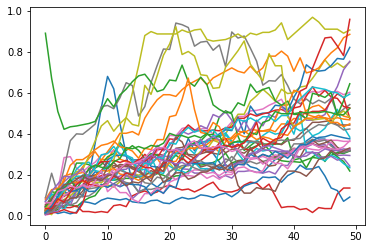

In [22]:
visualization_index = list(range(len(clustering_data[0])))
for i in visualization_data:
    sns.lineplot(y=i, x=visualization_index)

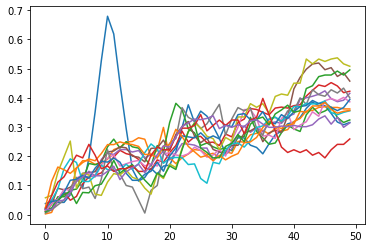

In [35]:
clustering_result = get_clustering(clustering_data, 2, 1)

visualization_data = []
for i in range(len(clustering_result)):
    if clustering_result[i] == max(set(clustering_result), key=list(clustering_result).count):
        visualization_data.append(clustering_data[i])
        
visualization_index = list(range(len(clustering_data[0])))
for i in visualization_data:
    sns.lineplot(y=i, x=visualization_index)

In [62]:
def get_cluster_grenze(w):
    n = len(w)
    ans = [0]*n
    for i in range(n-1):
        if w[i] != w[i+1]:
            ans[i+1] = i+1
    return ans

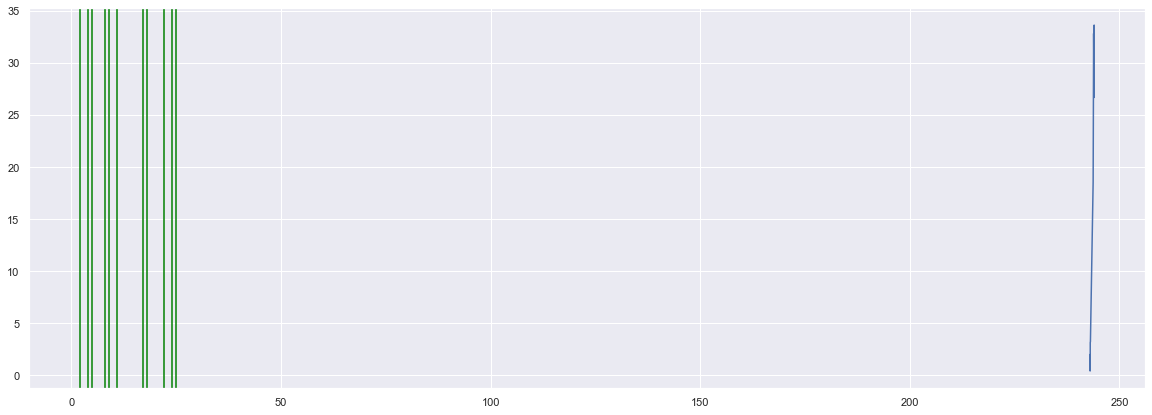

In [65]:
sns.set(rc={'figure.figsize':(20,7)})
c = []
for i in a:
    c.append(-i[0])
clusters = get_clustering(a, 4, 1)
#sns.scatterplot(y=clusters, x=c)
sns.lineplot(y=b, x=d)
for i in get_cluster_grenze(clusters):
    if i != 0:
        plt.axvline(i, 0,1, color="green")

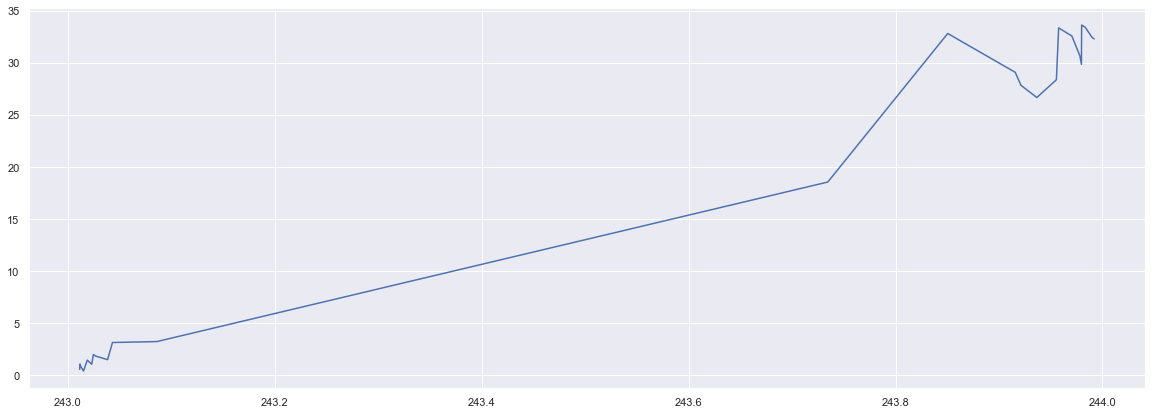

In [64]:
b = []
d = []
for i in a:
    b.append(35*i[1])
for i in a:
    d.append(i[0]+243)
sns.lineplot(y=b, x=d)

In [55]:
def generate_z_vector(arr, n): #arr - наш ряд, n - длина z-вектора
    z_vector = []
    for i in range(n):
        z_vector.append(randint(1, len(arr) // n))
    return z_vector


def generate_z_vector2(arr, n): #гнилой алгорит, выдает ошибку, а если не выдает, то значит резы хуйня полная
    z_vector = []
    random_range = len(arr)
    for i in range(n):
        x = randint(0, random_range)
        z_vector.append(x)
        random_range -= x
    return z_vector

arr = []
for i in range(30): #создаем рандомную хуйню 
    arr.append(randint(0, 100))
print(*arr)
z_vector = generate_z_vector(arr, 10)
z_vector2 = generate_z_vector2(arr, 10)
print(z_vector)


75 97 18 3 53 46 8 74 20 74 86 22 58 89 66 81 87 87 67 58 32 21 59 21 5 61 62 80 47 37
[3, 2, 1, 1, 3, 2, 2, 2, 1, 1]


3 5 6 7 10 12 14 16 17 18
3 46 8 74 86 58 66 87 87 67


<AxesSubplot:>

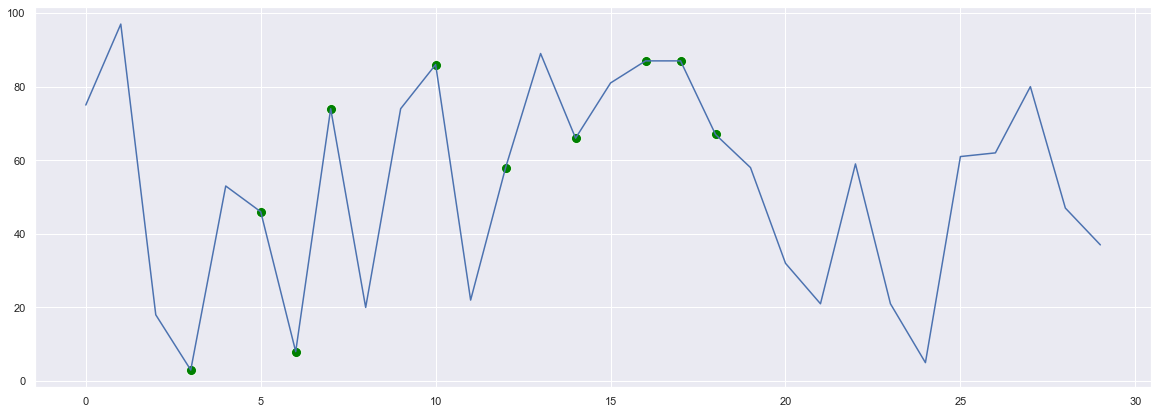

In [56]:
sns.set(rc={'figure.figsize':(20,7)})


axis2 = []
axis2.append(z_vector[0])
for i in range(1, len(z_vector)):
    axis2.append(z_vector[i] + axis2[i - 1]) #вот тут самая залупа. короче прикол в том что эта з-залупа она аккомулитивная, короче значения которые лежат в z-vector они скалдываются, нахуя так костыльно - не ебу, но так написано так что хуй бы с ним
#в общем можешь открыть Fig.2 в той самой пдфке - там нормальный рисунок разберешься
print(*axis2)
values = []
for i in range(len(z_vector)):
    values.append(arr[axis2[i]]) #танцы с бубном
    
print(*values)
sns.scatterplot(x=axis2, y=values, color='green', s=100)

axis = list(range(len(arr)))
sns.lineplot(x=axis, y=arr)